<a href="https://colab.research.google.com/github/TonyQ2k3/pytorch-training/blob/main/exercises/exercise_day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Day 6

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [6]:
# Download helper function
import requests
from pathlib import Path

if Path("helper_functions.py").is_file() is not True:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [23]:
# Prepare data
NUM_CLASSES = 4
NUM_FEATURES = 2
NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_blobs(
    n_samples=NUM_SAMPLES,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    random_state=RANDOM_SEED
)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
print(X_train.shape)
print(y_train.shape)

torch.Size([800, 2])
torch.Size([800])


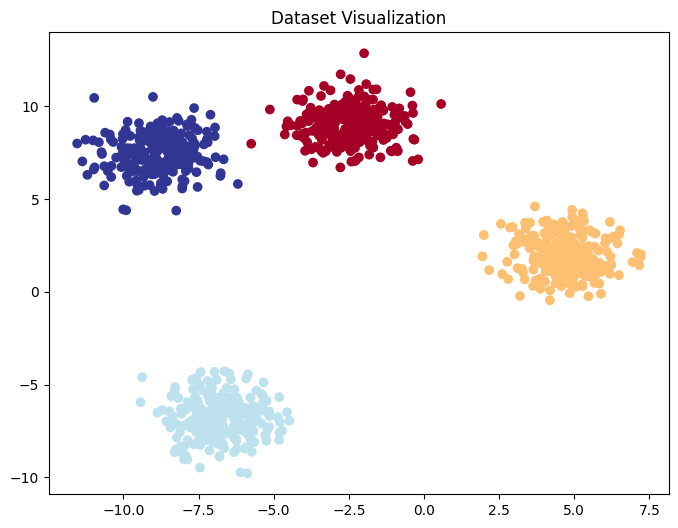

In [24]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.title("Dataset Visualization")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [25]:
# Building the model
class BlobModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(2, 8),
        nn.ReLU(),
        nn.Linear(8, 8),
        nn.ReLU(),
        nn.Linear(8, 4),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [26]:
torch.manual_seed(RANDOM_SEED)
model = BlobModel()

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
epochs = 100

In [28]:
train_losses = []
test_losses = []
eps = [x for x in range(epochs)]

In [29]:
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train)
  loss = loss_fn(y_logits, y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_loss = loss_fn(test_logits, y_test)
    test_losses.append(test_loss.item())

  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss = {loss}")

Epoch 0 | Loss = 1.1522938013076782
Epoch 10 | Loss = 0.6224877834320068
Epoch 20 | Loss = 0.3899121582508087
Epoch 30 | Loss = 0.20595048367977142
Epoch 40 | Loss = 0.07240418344736099
Epoch 50 | Loss = 0.03496384248137474
Epoch 60 | Loss = 0.022903278470039368
Epoch 70 | Loss = 0.01712673343718052
Epoch 80 | Loss = 0.01376260630786419
Epoch 90 | Loss = 0.011476505547761917


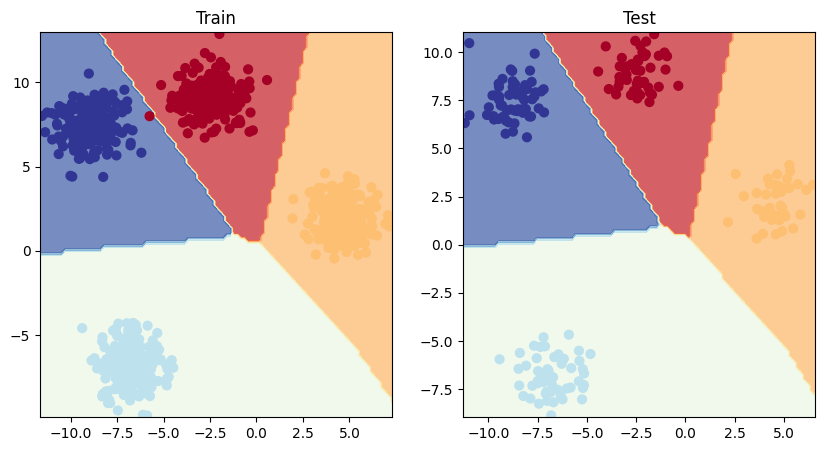

In [30]:
# Visualize result
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)